# GRIP - The Sparks Foundation

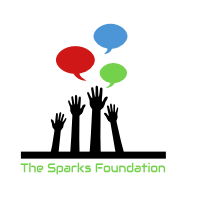

## Internship on Data Science and Business Analytics

### Author  :  Rohan Kumar Lala

# >>>>>>>>>>>Task - 4 : Exploratory Data Analysis - Terrorism<<<<<<<<<<<

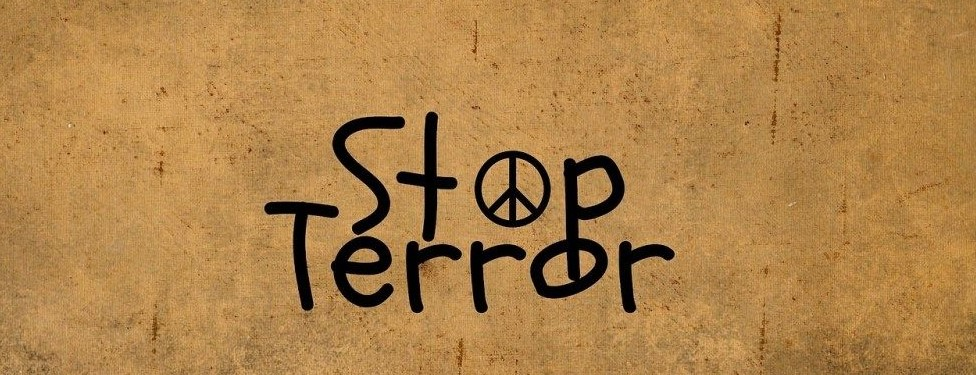

## Perform Exploratory Data Analysis on 'Global Terrorism'

_**Link for the dataset:**<br>&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;_ 
https://bit.ly/2TK5Xn5 

### DATA PREPROCESSING

**Importing Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline

**Importing Dataset**

In [49]:
df=pd.read_csv(r'C:/Users/KIIT/Downloads/globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

C:\Users\KIIT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

**Renaming columns**

In [51]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success'},inplace=True)

In [52]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head()

,Event_ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,Success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,N

In [53]:
df.describe()

,Event_ID,Year,Month,Day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,Success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, Event_ID to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


**Since dataset has 135 columns, pick only the relevant columns.**


In [55]:
terror_df = df[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group']]
terror_df

,Event_ID,Year,Month,Day,Country,Region,region,state,latitude,longitude,Success,AttackType,attacktype1,Target_type,targtype1,Target,natlty1_txt,Killed,Wounded,Motive,city,Weapon_type,Group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,2,NaN,18.456792,-69.951164,1,Assassination,1,Private Citizens & Property,14,Julio Guzman,Dominican Republic,1.0,0.0,NaN,Santo Domingo,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,1,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,"Nadine Chaval, daughter",Belgium,0.0,0.0,NaN,Mexico city,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,5,Tarlac,15.478598,120.599741,1,Assassination,1,Journalists & Media,10,Employee,United States,1.0,0.0,NaN,Unknown,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,8,Attica,37.997490,23.762728,1,Bombing/Explosion,3,Government (Diplomatic),7,U.S. Embassy,United States,NaN,NaN,NaN,Athens,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,4,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,7,Government (Diplomatic),7,U.S. Consulate,United States,NaN,NaN,NaN,Fukouka,Incendiary,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,11,Middle Shebelle,2.359673,45.385034,1,Armed Assault,2,Military,4,Checkpoint,Somalia,1.0,2.0,NaN,Ceelka Geelow,Firearms,Al-Shabaab
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,10,Lattakia,35.407278,35.942679,1,Bombing/Explosion,3,Military,4,Hmeymim Air Base,Russia,2.0,7.0,NaN,Jableh,Explosives,Muslim extremists
181688,201712310030,2017,12,31,Philippines,Southeast Asia,5,Maguindanao,6.900742,124.437908,1,Facility/Infrastructure Attack,7,Private Citizens & Property,14,Houses,Philippines,0.0,0.0,NaN,Kubentog,Incendiary,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,12,31,India,South Asia,6,Manipur,24.798346,93.940430,0,Bombing/Explosion,3,Government (General),2,Office,India,0.0,0.0,NaN,Imphal,Explosives,Unknown


In [56]:
terror_df.corr()

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded
Event_ID,1.000000,0.999996,0.002706,0.018336,0.401371,0.166886,0.003907,-0.082972,0.074173,0.079080,0.015351,0.015282
Year,0.999996,1.000000,0.000139,0.018254,0.401384,0.166933,0.003917,-0.082963,0.074153,0.079082,0.015341,0.015273
Month,0.002706,0.000139,1.000000,0.005497,-0.002999,-0.015978,-0.003880,-0.002845,0.006705,-0.000948,0.003463,0.002938
Day,0.018336,0.018254,0.005497,1.000000,0.009710,0.003423,-0.002285,-0.011802,-0.005333,-0.000052,-0.003693,-0.001268
region,0.401371,0.401384,-0.002999,0.009710,1.000000,0.309274,0.004351,-0.030909,0.007642,0.041396,0.042062,0.020472
latitude,0.166886,0.166933,-0.015978,0.003423,0.309274,1.000000,0.001463,-0.073715,0.010135,-0.022805,-0.018124,0.015988
longitude,0.003907,0.003917,-0.003880,-0.002285,0.004351,0.001463,1.000000,-0.000858,0.001554,-0.003418,-0.000562,0.000223
Success,-0.082972,-0.082963,-0.002845,-0.011802,-0.030909,-0.073715,-0.000858,1.000000,0.048408,-0.059637,0.053115,0.025804
attacktype1,0.074173,0.074153,0.006705,-0.005333,0.007642,0.010135,0.001554,0.048408,1.000000,0.014513,0.002475,0.000846
targtype1,0.079080,0.079082,-0.000948,-0.000052,0.041396,-0.022805,-0.003418,-0.059637,0.014513,1.000000,0.008499,0.011303


***The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0, with -1 indicating a perfect negative correlation, +1 indicating a perfect positive correlation, and 0 indicating no correlation at all. (A variable correlated with itself will always have a correlation coefficient of 1.)***

In [57]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Event_ID     181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   region       181691 non-null  int64  
 7   state        181270 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  Success      181691 non-null  int64  
 11  AttackType   181691 non-null  object 
 12  attacktype1  181691 non-null  int64  
 13  Target_type  181691 non-null  object 
 14  targtype1    181691 non-null  int64  
 15  Target       181055 non-null  object 
 16  natlty1_txt  180132 non-null  object 
 17  Killed       171378 non-null  float64
 18  Wounded      165380 non-

### Main features of the Dataset:

In [58]:
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


In [59]:
print("Country with the most attacks:",terror_df['Country'].value_counts().index[0])

Country with the most attacks: Iraq


In [60]:
print("City with the most attacks:",terror_df['city'].value_counts().index[1]) #as first value is unknown

City with the most attacks: Baghdad


In [61]:
print("Year with the most attacks:",terror_df['Year'].value_counts().index[0])

Year with the most attacks: 2014


In [62]:
print("Month with the most attacks:",terror_df['Month'].value_counts().index[0])

Month with the most attacks: 5


This would mean the month of May.

In [63]:
print("Most Attack Types:",terror_df['AttackType'].value_counts().index[0])

Most Attack Types: Bombing/Explosion


In [64]:
print("Most Targeted Type:",terror_df['Target_type'].value_counts().index[0])

Most Targeted Type: Private Citizens & Property


In [65]:
print("Terror group with the most attacks is:",terror_df['Group'].value_counts().index[1])#as first value is unknown

Terror group with the most attacks is: Taliban


### DATA VISUALIZATION

### Visualizing Terrorism data across the world (based on regions) through the years 1970-2017 

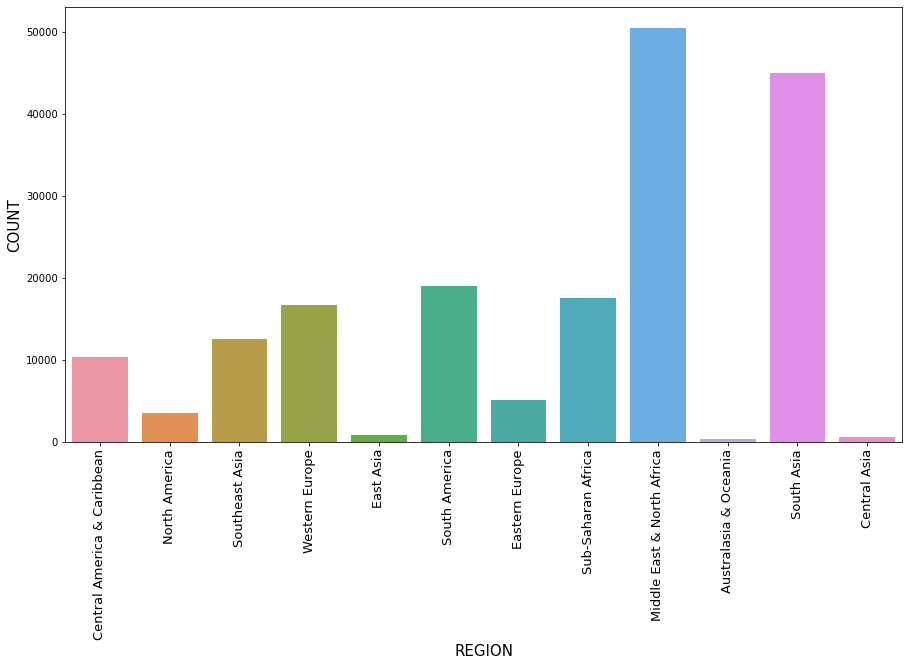

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(data = terror_df, x='Region')
plt.xticks(size = 13,rotation=90)
plt.xlabel("REGION",size=15)
plt.ylabel("COUNT",size=15)
plt.show()

### From the above plot, we see that the region affected the most by terrorist activity is Middle East and North Africa.

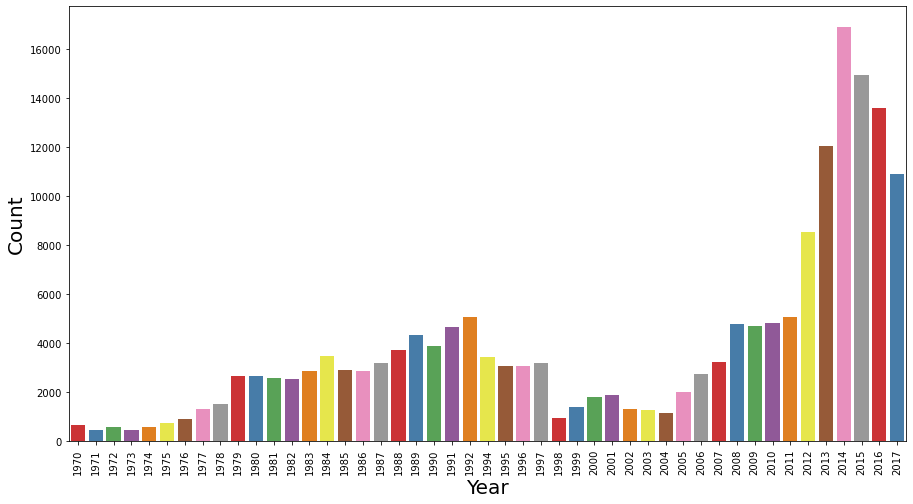

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(data = terror_df, x = 'Year',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

### We see, from the above visualization, that the year 2014 had the most terrorism related activities.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


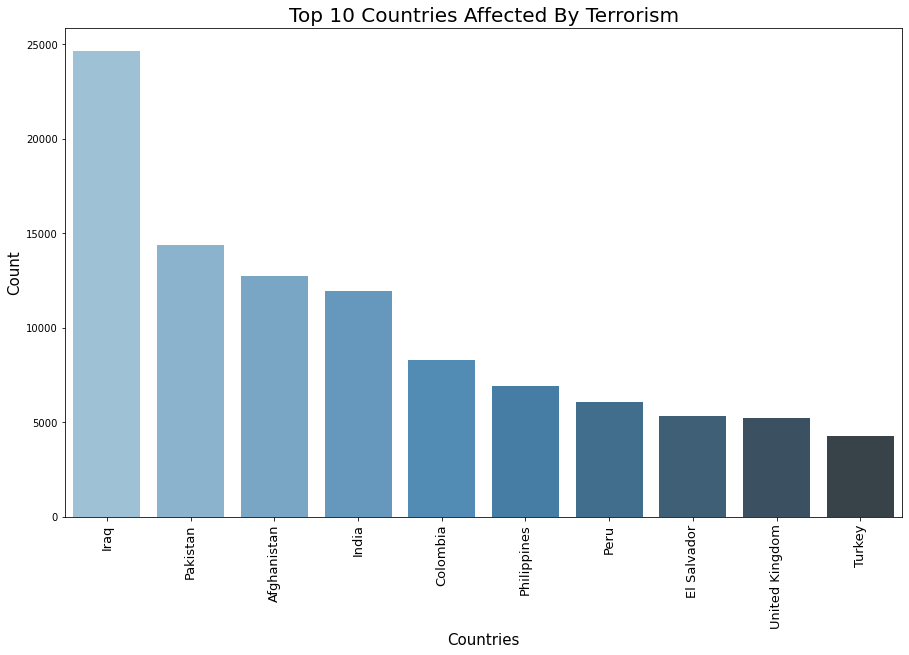

In [68]:
plt.figure(figsize=(15,9))
x = terror_df['Country'].value_counts().index[:10]
y = terror_df['Country'].value_counts().values[:10]
sns.barplot(x,y,palette='Blues_d')
plt.title('Top 10 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

### We can see that Iraq is the most affected nation from terrorism.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


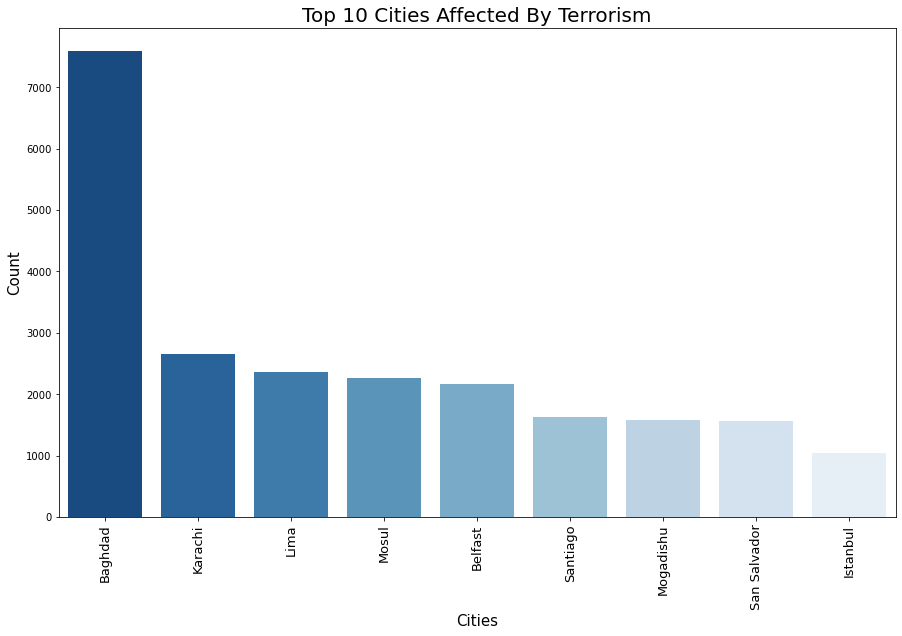

In [69]:
plt.figure(figsize=(15,9))
x = terror_df['city'].value_counts().index[1:10]
y = terror_df['city'].value_counts().values[1:10]
sns.barplot(x,y,palette='Blues_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

### We can see that Baghdad is the most affected city from terrorism.

In [70]:
terror_df_test=terror_df[['AttackType','Target_type','Success']]
terror_df_grp=terror_df_test.groupby(['AttackType','Target_type'],as_index=False).mean()
#terror_df_grp

In [71]:
terror_df_pivot=terror_df_grp.pivot(index='AttackType',columns=('Target_type'),values='Success')
terror_df_pivot.fillna(0,inplace=True)
terror_df_pivot

Target_type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,NGO,Other,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
AttackType,,,,,,,,,,,,,,,,,,,,,,
Armed Assault,0.875000,0.923077,0.964420,0.961730,0.952381,0.886115,0.946103,0.947507,0.896104,0.925419,0.964602,0.771429,0.933258,0.969119,0.968421,0.849057,0.974394,0.967391,0.975542,0.858974,0.898305,0.953704
Assassination,0.222222,0.562500,0.849687,0.863889,0.000000,0.493734,0.660649,0.751669,0.909091,0.780641,0.712644,1.000000,0.764644,0.861597,0.851770,0.750000,0.809380,0.777778,0.896552,0.885167,0.750000,0.675549
Bombing/Explosion,0.647059,0.843511,0.926955,0.881720,0.886792,0.860144,0.893353,0.904509,0.888060,0.916912,0.918182,0.949367,0.926065,0.926479,0.894914,0.932231,0.948487,0.881356,0.862514,0.312500,0.947175,0.878788
Facility/Infrastructure Attack,0.910995,0.894737,0.932084,0.958472,0.973684,0.921502,0.945284,0.907767,1.000000,0.940252,0.928571,1.000000,0.947170,0.961274,0.954758,0.960573,1.000000,0.882353,0.962662,0.676471,0.963455,0.978495
Hijacking,0.000000,0.821970,0.970588,0.777778,1.000000,0.851852,0.900000,1.000000,0.836364,0.913043,1.000000,1.000000,0.875000,0.926829,1.000000,0.000000,1.000000,1.000000,0.955882,0.800000,1.000000,0.000000
Hostage Taking (Barricade Incident),1.000000,0.928571,0.985366,1.000000,1.000000,0.982759,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981481,0.986301,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Hostage Taking (Kidnapping),1.000000,0.888889,0.969540,0.985632,1.000000,0.906542,0.962594,0.979210,1.000000,0.976487,0.996815,1.000000,0.991597,0.986039,0.980392,1.000000,0.983051,0.989899,0.975000,0.945946,1.000000,0.991597
Unarmed Assault,1.000000,0.666667,0.857143,0.750000,0.166667,0.852941,0.619835,0.918367,0.000000,0.802326,1.000000,1.000000,0.953488,0.964187,0.827586,1.000000,1.000000,1.000000,0.847826,1.000000,1.000000,1.000000
Unknown,0.000000,0.825000,0.878220,0.952381,1.000000,0.858209,0.882904,0.898876,0.866667,0.750898,0.968750,0.666667,0.856345,0.834494,0.979592,1.000000,0.812183,1.000000,0.901515,0.880597,0.925234,0.934211


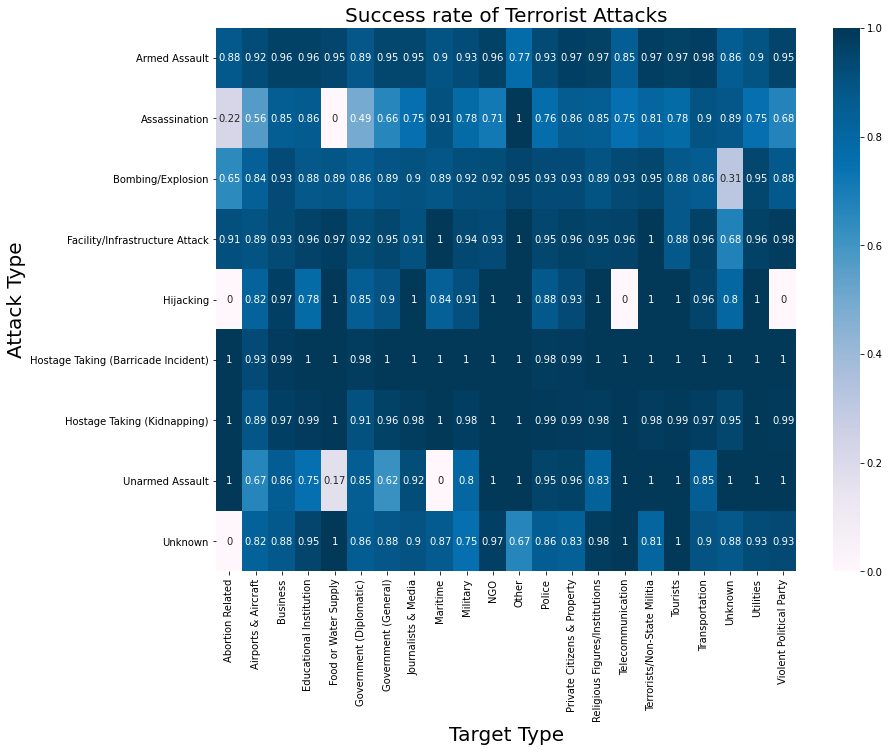

In [72]:
plt.figure(figsize=(13,10))
sns.heatmap(terror_df_pivot,annot=True,cmap="PuBu")
plt.title("Success rate of Terrorist Attacks",size=20)
plt.xlabel('Target Type',size = 20)
plt.ylabel("Attack Type",size = 20)
plt.xticks(rotation=90)
plt.show()

###  This heatmap shows the success rate of terrorist attacks depending on the attack type and the target type. We can see that the Terrorrist attacks with almost 100% success rate are Hostage Taking(Barricade Incidents), while the worst affected target type are Private Citizens & their property.

In [73]:
Iraq_Attack = terror_df[terror_df.Country == 'Iraq']
Iraq_Attack['Day'][Iraq_Attack.Day == 0] = 1
Iraq_Attack['Date'] = pd.to_datetime(Iraq_Attack[['Year','Month','Day']])
Iraq_Attack.drop(['Year','Month','Day'], axis = 1, inplace = True)
Iraq_Attack_Columns = Iraq_Attack.columns.tolist()
Iraq_Attack_Columns.insert(1, Iraq_Attack_Columns.pop(Iraq_Attack_Columns.index('Date')))
Iraq_Attack = Iraq_Attack.reindex(columns = Iraq_Attack_Columns)

<ipython-input-73-40f6c8afee2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iraq_Attack['Day'][Iraq_Attack.Day == 0] = 1
C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-73-40f6c8afee2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iraq_Attack['Date'] 

In [74]:
iraq_casualties_df= Iraq_Attack.groupby('AttackType')['AttackType'].count().reset_index(name = "Attack")
killed= np.asarray(Iraq_Attack.groupby('AttackType')['Killed'].count())
iraq_casualties_df['Killed'] = (killed/killed.sum()) *100; wounded= np.asarray(Iraq_Attack.groupby('AttackType')['Wounded'].count())
iraq_casualties_df['Wounded'] = (wounded/wounded.sum())*100; del iraq_casualties_df['Attack']
iraq_casualties_df #Percentage of killed and injured is calculated and displayed for the attack types

,AttackType,Killed,Wounded
0,Armed Assault,13.002384,12.849807
1,Assassination,5.378278,5.395807
2,Bombing/Explosion,75.525909,76.067608
3,Facility/Infrastructure Attack,0.623144,0.594780
4,Hijacking,0.041822,0.042790
5,Hostage Taking (Barricade Incident),0.096190,0.089859
6,Hostage Taking (Kidnapping),2.471666,2.293539
7,Unarmed Assault,0.025093,0.021395
8,Unknown,2.835515,2.644416


<Figure size 1080x648 with 0 Axes>

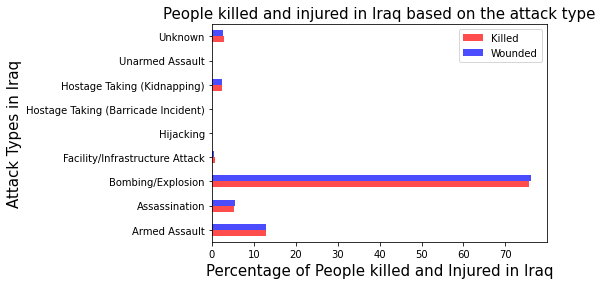

In [75]:
colors = ('red','blue')
plt.figure(figsize=(15,9))
g = iraq_casualties_df.plot(kind='barh', color=colors, alpha=0.7, align = 'center')
g.set_yticklabels(iraq_casualties_df['AttackType'])
g.set_xlabel("Percentage of People killed and Injured in Iraq",size=15)
g.set_ylabel("Attack Types in Iraq",size=15)
g.set_title("People killed and injured in Iraq based on the attack type",size=15)
plt.show()

### It is observed that the number of people killed is mostly equal to the number of people wounded in the terrorist attacks in Iraq.

In [76]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_new_df = terror_df.copy()
terror_new_df['Casualties'] = terror_df['Killed'] + terror_df['Wounded']

<ipython-input-76-fcfe8a4057b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
<ipython-input-76-fcfe8a4057b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)


In [77]:
terror_new_df1 = terror_new_df.sort_values( by = 'Casualties', ascending=False)[:20]

In [78]:
heat_object=terror_new_df1.pivot_table(index='Country',columns='Year',values='Casualties')
heat_object.fillna(0,inplace=True)
heat_object

Year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2006,2007,2008,2014,2016,2017
Country,,,,,,,,,,,,,,,
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1261.5,1503.0,0.0
Japan,0.0,0.0,0.0,0.0,5513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1071.0,0.0,0.0,0.0,0.0,0.0,0.0
Rwanda,0.0,0.0,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Somalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,904.0


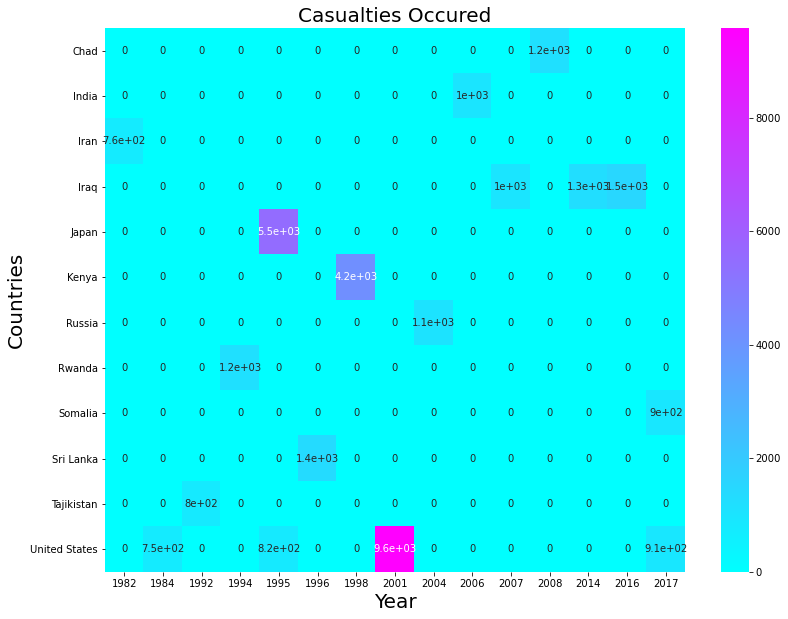

In [79]:
plt.figure(figsize=(13,10))
sns.heatmap(heat_object,annot=True, cmap="cool")
plt.xlabel('Year',size = 20)
plt.ylabel("Countries",size = 20)
plt.title("Casualties Occured",size=20)
plt.show()

#### This Heatmap can be visualized for each country and year individually as well by selecting that particular country in the required year. It will display country, year and casualties in that particular terrorist activity when hovered over the required area.

## In our heatmap, United States has the highest casualty in the year 2001 which actually highlights the 9/11 World Trade Center attacks in New York killing thousands.

In [80]:
weapon_df = terror_df.groupby(['Weapon_type'])['Event_ID'].count().reset_index().sort_values('Event_ID', ascending = False)
weapon_df.columns = ['WeaponType','Attacks']
weapon_df

,WeaponType,Attacks
2,Explosives,92426
4,Firearms,58524
10,Unknown,15157
5,Incendiary,11135
6,Melee,3655
1,Chemical,321
9,Sabotage Equipment,141
11,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
0,Biological,35


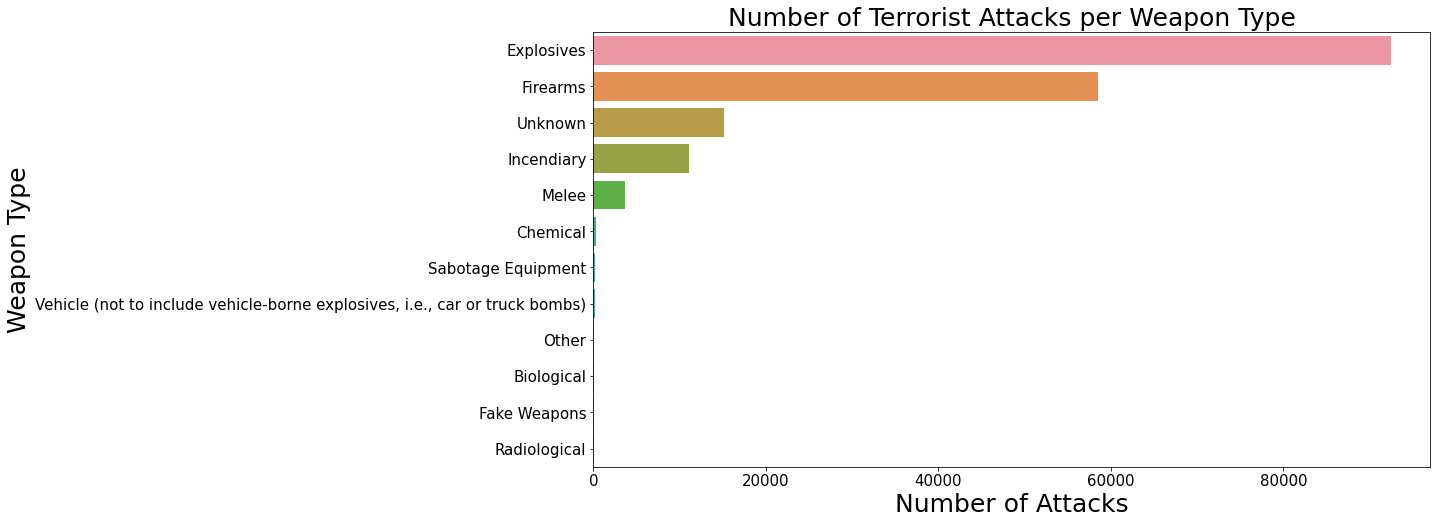

In [81]:
plt.figure(figsize=(15,8))
sns.barplot(x='Attacks', y='WeaponType', data=weapon_df)
plt.title("Number of Terrorist Attacks per Weapon Type",size=25)
plt.xlabel('Number of Attacks',size = 25)
plt.ylabel("Weapon Type",size = 25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Explosives and Firearms alone constitute the majority of attacks recorded in our dataset.

In [82]:
terror_df['Group'].value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

<BarContainer object of 9 artists>

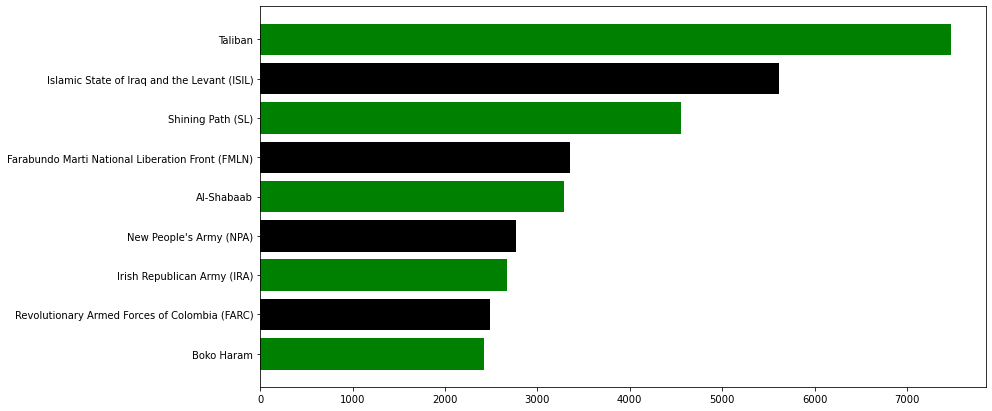

In [83]:
plt.figure(figsize=(13,7))
x = terror_df['Group'].value_counts().index[1:10]
y = terror_df['Group'].value_counts().values[1:10]
x = list(x)
x.reverse()
y = list(y)
y.reverse()
plt.barh(x,y,color=['green','black'])

### From the above plot, Taliban is clearly the most active Terror group.

# Geographical display of regions affected by terrorism:

In [84]:
BBox = [-180,180,-90,90]

In [85]:
black_region = terror_new_df.loc[(terror_new_df['Casualties']>10) ]
light_red_region = terror_new_df.loc[(terror_new_df['Casualties'] < 10) &(terror_new_df['Casualties'] > 0)]
yellow_region = terror_new_df.loc[terror_new_df['Casualties'] == 0]

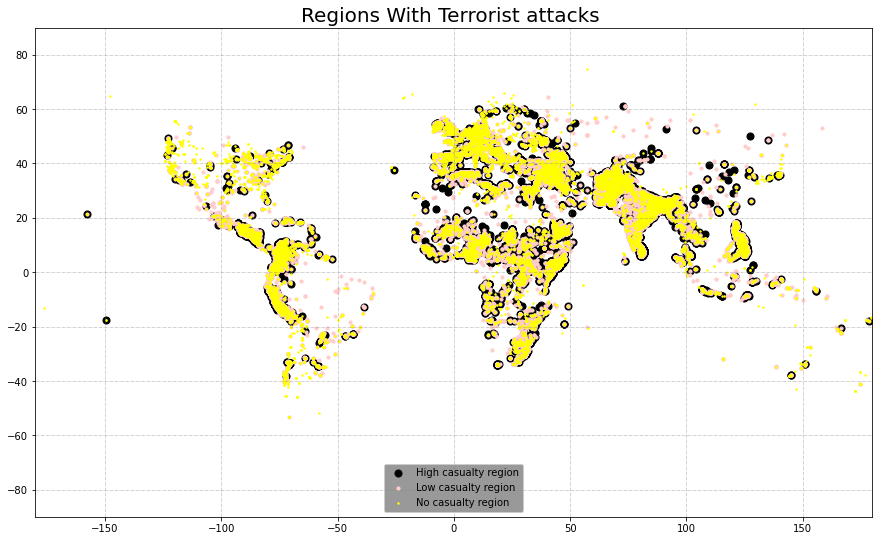

In [86]:
fig, ax = plt.subplots(figsize = (15,9))
ax.scatter(black_region.longitude,black_region.latitude, zorder=1, c='black', s=50)
ax.scatter(light_red_region.longitude,light_red_region.latitude, zorder=1, c='#ffcccb', s=10)
ax.scatter(yellow_region.longitude,yellow_region.latitude, zorder=1, c='yellow', s=2,)
ax.set_title("Regions With Terrorist attacks ",size = 20)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7)
labels = ["High casualty region","Low casualty region","No casualty region"]
plt.legend(labels, loc="lower center", facecolor="gray")
plt.show()

#  Terrorist attacks in a particular year with their locations:

In [87]:
print("Year with the least attacks:",terror_df['Year'].value_counts().index[-1])

Year with the least attacks: 1971


### 1971: Year with minimum terrorist attacks

#### Let's have a look at the terrorist attacks in the year 1971.

In [88]:
filterYear = df['Year'] == 1971

In [89]:
filterData = df[filterYear] # filter data
#filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
reqFilterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 651 to 1121
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       463 non-null    object 
 1   latitude   463 non-null    float64
 2   longitude  463 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.5+ KB


In [90]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = folium.Popup(reqFilterDataList[point][0], parse_html=True)).add_to(markerCluster)
map

In [91]:
print("Year with the most attacks:",terror_df['Year'].value_counts().index[0])

Year with the most attacks: 2014


### 2014: Year with maximum terrorist attacks


#### Let's have a look at the terrorist attacks in the year 2014.

In [92]:
filterYear = df['Year'] == 2014

In [93]:
filterData = df[filterYear] # filter data
#filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
reqFilterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16794 entries, 125335 to 144629
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       16794 non-null  object 
 1   latitude   16794 non-null  float64
 2   longitude  16794 non-null  float64
dtypes: float64(2), object(1)
memory usage: 524.8+ KB


In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = folium.Popup(reqFilterDataList[point][0], parse_html=True)).add_to(markerCluster)
map

# Key Conclusions:

***1. Middle East and North Africa are the hot-zone of Terrorism.***


***2. As per our dataset, Terrorist activities occur the most in Iraq, Pakistan and Afghanistan. These countries need to make strong anti-terrorism policies.***


***3. Taliban and ISIL are the most active Terror groups as per our dataset.***


***4. Bombings/explosions and Firearms cause the majority of casualty. Terror fundings for such weapons through backdoors ought to be stopped.***


***5. 2014 is the year with the most terrorist attacks between 1970-2017 as per our dataset.***

***6. The Terrorrist attacks with almost 100% success rate are Hostage Taking (Barricade Incidents), while the worst affected target type are Private Citizens & their property.***

# Thank you for your time!

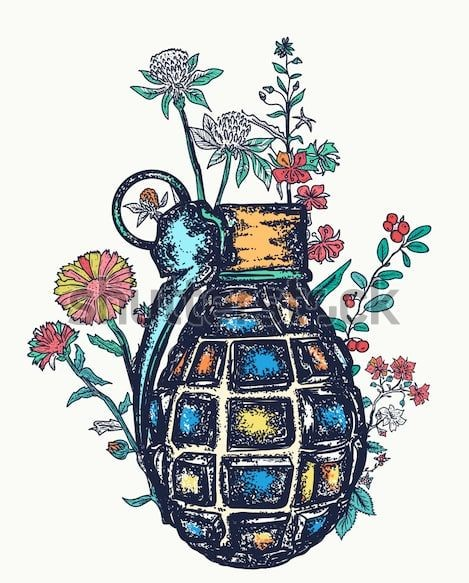